# Example: Naive Bayes Object Recognition

* Author:        Johannes Maucher
* Last Update:   24.02.2021

This notebook demonstrates the concept of probabilistic object recognition as introduced in {cite}`SchieleC00` and described in the [previous section](naiveBayesHistogram).


The simple model applied here assumes that for 3 different objects 1-dimensional histograms of an arbitrary feature (e.g. the pixel-values of a greyscale image) have been estimated from training data. The entire value range is partitioned into 8 bins. In a new picture 4 measurements of the same feature have been performed. The 4 measurements belong to bins $2,5,6$ and $2$. The Naive Bayes Classifier approach is applied to determine which of the 3 known objects has the maximum probability to be contained in the new picture, given the 4 measurements.  

In [1]:
from matplotlib import pyplot as plt
import numpy as np

It is assumed that the 1-dimesional histograms of the 3 different objects are known. These histograms are defined and visualized below:

(3, 8)


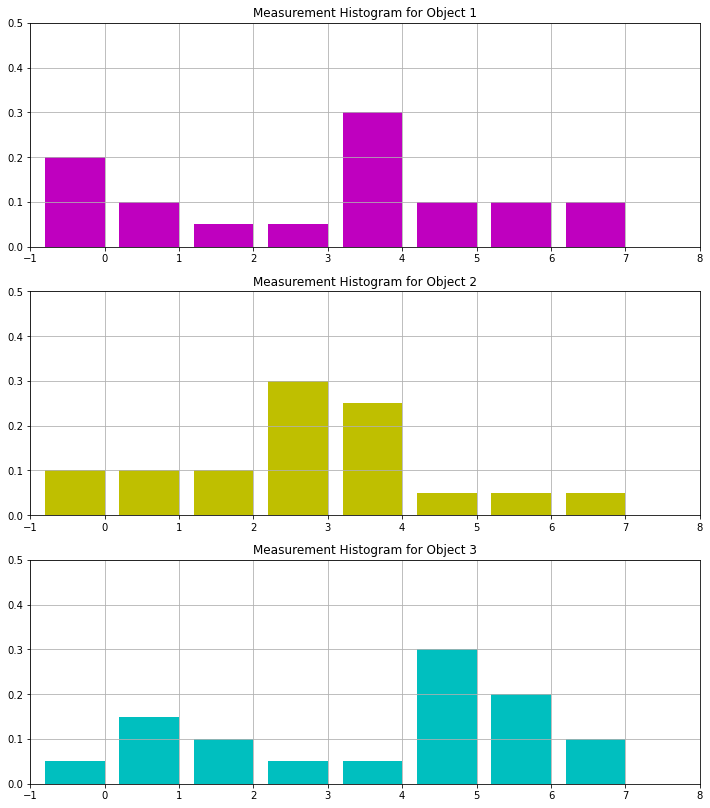

In [2]:
hist1=np.array([0.2,0.1,0.05,0.05,0.3,0.1,0.1,0.1])
hist2=np.array([0.1,0.1,0.1,0.3,0.25,0.05,0.05,0.05])
hist3=np.array([0.05,0.15,0.1,0.05,0.05,0.3,0.2,0.1])
histarray=np.array([hist1,hist2,hist3])
plt.figure(figsize=(12,14))
colors=['m','y','c']
print(histarray.shape)
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.bar(np.arange(8)-0.4,histarray[i,:],color=colors[i])
    plt.xlim((-1,8))
    plt.ylim((0,0.5))
    plt.grid(True)
    plt.title('Measurement Histogram for Object '+str(i+1))

For a query picture it shall be determined, which of the 3 known objects is most probably contained in the picutre. For this 4 measurements are performed in the picture. The measurements $m_i$ fall into bins $m_1=2,m_2=5,m_3=6$ and $m_4=2$.

In [3]:
newMeas=np.array([2,5,6,2])

Naive Bayes classification is implemented in the few lines of codes below. The a-posteriori likelihood 

$$
p(o_n|m_1,m_2, \ldots, m_k) = \frac{ \prod_j p(m_j|o_n) \cdot p(o_n)}{\sum_i \prod_j p(m_j|o_i) \cdot p(o_i))}.
$$ 

is calculated for all 3 objects. Here it is assumed that the a-priori probability of each object is the same $p(o_i)=\frac{1}{3}$ for $i \in [1,2,3]$, i.e. it can be disregarded for classification task: 

In [4]:
prob=[1.0,1.0,1.0]
for p in range(len(prob)):
    for m in range(len(newMeas)):
        prob[p]=prob[p]*histarray[p,newMeas[m]]

sumprob=np.sum(prob)
for p in range(len(prob)):
    print("Probability for object  "+str(p+1),prob[p]/sumprob)

print("Recognized object: ",np.argmax(prob)+1)

Probability for object  1 0.03846153846153847
Probability for object  2 0.03846153846153847
Probability for object  3 0.923076923076923
Recognized object:  3


The classifier finds that object 3 is most probably contained in the query picture.